<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_06_01_survival_analysis_standard_joint_model_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 6.1 Standard (Shared Random Effects) Joint Model


The **Standard (Shared Random Effects) Joint Model** is the most widely used framework for simultaneously analyzing **longitudinal biomarker data** and **time-to-event (survival) outcomes**. It explicitly accounts for the fact that the longitudinal measurements (e.g., repeated lab values) and the event process (e.g., death, disease progression) are **interdependent**—often because the underlying health trajectory influences both.

The core idea: **link the two processes through shared subject-specific random effects**, which capture unobserved heterogeneity across individuals.


## Overview


In a mixed-effects longitudinal model, random effects (e.g., random intercepts/slopes) represent individual deviations from the population average trajectory. In a joint model, these **same random effects** are included in the survival submodel to explain differences in event risk. This “sharing” induces correlation between the longitudinal and event processes.


The standard joint model consists of **two submodels**:


**Longitudinal Submodel Typically a Linear Mixed-Effects Model)**

$$
y_i(t) = m_i(t) + \varepsilon_i(t) = \underbrace{x_i^\top(t) \beta}_{\text{Fixed effects}} + \underbrace{z_i^\top(t) b_i}_{\text{Random effects}} + \varepsilon_i(t)
$$

- $y_i(t)$: observed longitudinal outcome for subject $i$ at time $t$
- $x_i(t)$: vector of fixed-effect covariates (e.g., time, treatment)
- $\beta$: fixed-effect coefficients
- $z_i(t)$: design vector for random effects (often includes intercept and time)
- $b_i \sim \mathcal{N}(0, D)$: subject-specific random effects (e.g., random intercept $b_{0i}$, random slope $b_{1i}$
- $\varepsilon_i(t) \sim \mathcal{N}(0, \sigma^2)$: measurement error, independent of $b_i$)

The **true (unobserved) longitudinal trajectory** is:

$$
m_i(t) = x_i^\top(t)\beta + z_i^\top(t)b_i
$$

**Survival (Event Time) Submodel (Typically a relative risk model with baseline hazard)**

$$
h_i(t) = h_0(t) \exp\left( w_i^\top \gamma + \alpha \cdot \eta\big(m_i(t), b_i, t\big) \right)
$$

- $h_i(t)$: hazard of the event for subject $i$ at time $t$
- $h_0(t)$: baseline hazard function (can be parametric like Weibull, or semi-parametric using splines)
- $w_i$: vector of baseline/time-independent covariates (e.g., age, treatment group)
- $gamma$: log-hazard ratios for covariates
- $\alpha$: **association parameter** — quantifies how the longitudinal process affects event risk
- $\eta(\cdot)$: **association structure** linking longitudinal and survival processes


### Common Association Structures $\eta(\cdot)$


The choice of $\eta$ defines how the biomarker influences risk:

| Association Type | Form | Interpretation |
|------------------|------|----------------|
| **Current value** | $\eta = m_i(t)$ | Instantaneous biomarker level affects current hazard |
| **Current slope** | $\eta = m_i'(t) = \frac{d}{dt}m_i(t)$ | Rate of change (e.g., rapid decline) affects risk |
| **Random effects** | $\eta = b_i$ | Subject’s deviation from population (e.g., low baseline) affects baseline hazard |
| **Combined** | $\eta = m_i(t) + m_i'(t)$ | Both level and trend matter |

> The **current value** parameterization is the most common and often serves as the "standard" joint model.


### Key Assumptions


- **Conditional independence**: Given the random effects $b_i$ and thus $m_i(t)$, the longitudinal and event processes are independent.
- **Normality**: Random effects $b_i \sim \mathcal{N}(0, D)$; measurement errors $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$.
- **Correct specification** of the association structure and baseline hazard.



### Estimation


Typically done via **maximum likelihood**:

$$
L(\theta) = \prod_{i=1}^n \left[ \int f(y_i \mid b_i; \theta_L) \cdot f(T_i, \delta_i \mid b_i; \theta_S) \cdot f(b_i; D)  \, db_i \right]
$$
- $\theta = (\theta_L, \theta_S, D, \sigma^2, \alpha)$: full parameter vector
- Integration over \( b_i \) is done numerically (e.g., **Gauss-Hermite quadrature** or **Monte Carlo**)
- Alternatively, **Bayesian MCMC** can be used



### Advantages


- Reduces **bias from informative dropout** (e.g., patients with worsening biomarkers drop out and die)
- Accounts for **measurement error** in biomarkers
- Enables **dynamic predictions**: update survival probability as new longitudinal data arrive
- Provides **mechanistic insight**: quantifies how biomarker trajectories drive risk



### Example


> **Study**: Prostate cancer patients monitored via repeated PSA (prostate-specific antigen) tests; event = metastasis.
>
> - **Longitudinal**: PSA modeled with random intercept/slope.
> - **Survival**: Hazard of metastasis depends on **current true PSA level**.
> - **Result**: Higher PSA trajectory → significantly increased metastasis risk (\( \hat{\alpha} > 0 \)).

This fits the standard shared random effects joint model with current-value association.



## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316565 sha256=a4fba163eac6294a26aefd4c023d7338a68ecafe23bd7aa0e2f5c17c1c8444fc
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [ ]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Implementation in R


Standard joint models can be implemented in R using several packages, including {JM}, {joineR}, and {JMbayes}. Below, we provide an example of how to fit a standard joint model using the {JM} and {joineR} package.



### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [ ]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression',
		 'prodlim',
		 'lava',
		 'mstate',
		 'regplot',
		 'cmprskcoxmsm',
		 'GLMMadaptive',
		 'nlme',
		 'lme4',
		 'lattice',
		 'JM',
		 'joineR',
		 'joineRML',
		 'JMbayes2',
		 'gridExtra	'

		 )


### Install missing packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')


### Verify Installation

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom

  method         from 
  augment.mjoint broom
  glance.mjoint  broom
  tidy.mjoint    broom



     tidyverse       survival      survminer      ggsurvfit     tidycmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggfortify        timereg         cmprsk       condSURV riskRegression 
          TRUE           TRUE           TRUE           TRUE           TRUE 
       prodlim           lava         mstate        regplot   cmprskcoxmsm 
          TRUE           TRUE           TRUE           TRUE           TRUE 
  GLMMadaptive           nlme           lme4        lattice             JM 
          TRUE           TRUE           TRUE           TRUE           TRUE 
        joineR       joineRML       JMbayes2 
          TRUE           TRUE           TRUE 


### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
 [1] "package:JMbayes2"       "package:joineRML"       "package:joineR"        
 [4] "package:JM"             "package:splines"        "package:MASS"          
 [7] "package:lattice"        "package:lme4"           "package:Matrix"        
[10] "package:nlme"           "package:GLMMadaptive"   "package:cmprskcoxmsm"  
[13] "package:regplot"        "package:mstate"         "package:lava"          
[16] "package:prodlim"        "package:riskRegression" "package:condSURV"      
[19] "package:cmprsk"         "package:timereg"        "package:ggfortify"     
[22] "package:tidycmprsk"     "package:ggsurvfit"      "package:survminer"     
[25] "package:ggpubr"         "package:survival"       "package:lubridate"     
[28] "package:forcats"        "package:stringr"        "package:dplyr"         
[31] "package:purrr"          "package:readr"          "package:tidyr"         
[34] "package:tibble"         "package:ggplot2"        "package:tidyverse"     
[37] "pack

## The {JM} Package


The {JM} package is a comprehensive tool for fitting joint models of longitudinal and time-to-event data in R. It provides functions for estimating the parameters of the longitudinal and survival submodels, as well as the association structure linking the two. The package also offers tools for making predictions and assessing the model's performance. Below, we demonstrate how to use the {JM} package to fit joint models to longitudinal and time-to-event data.

The joint model consists of two submodels: a linear mixed model for the longitudinal CD4 cell counts and a Cox proportional hazards model for the survival outcomes. The two submodels are linked by a shared parameter that captures the association between the longitudinal and survival processes.


#### Data


We'll use the `aids` dataset from the {JM} package to demonstrate how to perform joint modeling of longitudinal and time-to-event data in R. A randomized clinical trial in which both longitudinal and survival data were collected to compare the efficacy and safety of two antiretroviral drugs in treating patients who had failed or were intolerant of zidovudine (`AZT`) therapy. The dataset contains information on patients' CD4 cell counts (`CD4`) and survival status (`death`) over time, along with other covariates. The goal is to model the relationship between `CD4` cell counts and survival outcomes.

The dataset used is the same that the one seen with the mixed model, `aids`. The survival information can be found in `aids.id`.

A data frame with 1408 observations on the following 9 variables.

`patiet`: patients identifier; in total there are 467 patients.

`Time`: the time to death or censoring.

`death`: a numeric vector with 0 denoting censoring and 1 death.

`CD4`: the CD4 cells count.

`obstime`: the time points at which the CD4 cells count was recorded.

`drug`: a factor with levels ddC denoting zalcitabine and ddI denoting didanosine.

`gender`: a factor with levels female and male.

`prevOI`: a factor with levels AIDS denoting previous opportunistic infection (AIDS diagnosis) at study entry, and noAIDS denoting no previous infection.

`AZT`: a factor with levels intolerance and failure denoting AZT intolerance and AZT failure, respectively.


In [ ]:
%%R
data("aids", package = "JM")
glimpse(aids)

Rows: 1,405
Columns: 12
$ patient <fct> 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7,…
$ Time    <dbl> 16.97, 16.97, 16.97, 19.00, 19.00, 19.00, 19.00, 18.53, 18.53,…
$ death   <int> 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…
$ CD4     <dbl> 10.677078, 8.426150, 9.433981, 6.324555, 8.124038, 4.582576, 5…
$ obstime <int> 0, 6, 12, 0, 6, 12, 18, 0, 2, 6, 0, 2, 6, 12, 0, 2, 6, 12, 0, …
$ drug    <fct> ddC, ddC, ddC, ddI, ddI, ddI, ddI, ddI, ddI, ddI, ddC, ddC, dd…
$ gender  <fct> male, male, male, male, male, male, male, female, female, fema…
$ prevOI  <fct> AIDS, AIDS, AIDS, noAIDS, noAIDS, noAIDS, noAIDS, AIDS, AIDS, …
$ AZT     <fct> intolerance, intolerance, intolerance, intolerance, intoleranc…
$ start   <int> 0, 6, 12, 0, 6, 12, 18, 0, 2, 6, 0, 2, 6, 12, 0, 2, 6, 12, 0, …
$ stop    <dbl> 6.00, 12.00, 16.97, 6.00, 12.00, 18.00, 19.00, 2.00, 6.00, 18.…
$ event   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…


In [ ]:
%%R
data("aids.id", package = "JM")
glimpse(aids.id)

Rows: 467
Columns: 12
$ patient <fct> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…
$ Time    <dbl> 16.97, 19.00, 18.53, 12.70, 15.13, 1.90, 14.33, 9.57, 11.57, 1…
$ death   <int> 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,…
$ CD4     <dbl> 10.677078, 6.324555, 3.464102, 3.872983, 7.280110, 4.582576, 6…
$ obstime <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ drug    <fct> ddC, ddI, ddI, ddC, ddI, ddC, ddC, ddI, ddC, ddI, ddC, ddI, dd…
$ gender  <fct> male, male, female, male, male, female, male, female, male, ma…
$ prevOI  <fct> AIDS, noAIDS, AIDS, AIDS, AIDS, AIDS, AIDS, noAIDS, AIDS, AIDS…
$ AZT     <fct> intolerance, intolerance, intolerance, failure, failure, failu…
$ start   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ stop    <dbl> 6.00, 6.00, 2.00, 2.00, 2.00, 1.90, 2.00, 2.00, 2.00, 2.00, 2.…
$ event   <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,…


### Visualize Longitudinal Data

In [ ]:
%%R
# Visualization function
visualize_datasets <- function(aids_df, aids_id_df) {

  # 1. CD4 trajectories for individual patients (first 15)
  patient_ids <- unique(aids_df$patient)[1:15]
  plot1 <- ggplot(aids_df[aids_df$patient %in% patient_ids, ],
                  aes(x = obstime, y = CD4, group = patient, color = as.factor(drug))) +
    geom_line(alpha = 0.6, size = 0.8) +
    scale_color_manual(values = c("red", "blue"), labels = c("ddC", "ddI")) +
    labs(
      x = "Time (months)",
      y = "CD4 Count",
      title = "Individual CD4 Trajectories\n(Red = ddC, Blue = ddI)",
      color = "Drug"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  # 2. Kaplan-Meier survival curves — FIXED: no pre-defined surv_obj
  plot2_all <- {
    fit_all <- survfit(Surv(Time, death) ~ 1, data = aids_id_df)
    ggsurvplot(
      fit_all,
      data = aids_id_df,
      risk.table = FALSE,
      conf.int = FALSE,
      ggtheme = theme_minimal(),
      palette = "grey40",
      legend = "bottom",
      censor.shape = "|",
      xlab = "Time (months)",
      ylab = "Survival Probability",
      title = "Kaplan-Meier Survival Curve (All Patients)"
    )$plot
  }

  plot2_drug <- {
    fit_drug <- survfit(Surv(Time, death) ~ drug, data = aids_id_df)
    ggsurvplot(
      fit_drug,
      data = aids_id_df,
      risk.table = FALSE,
      conf.int = FALSE,
      palette = c("red", "blue"),
      legend.labs = c("ddC", "ddI"),
      ggtheme = theme_minimal(),
      censor = FALSE,
      censor.shape = "|",
      xlab = "Time (months)",
      ylab = "Survival Probability",
      title = "Kaplan-Meier Survival Curves by Treatment"
    )$plot +
      theme(legend.position = "bottom")
  }

  # Use arrangeGrob to combine into a reusable grob (not NULL!)
  plot2 <- arrangeGrob(plot2_all, plot2_drug, ncol = 2)

  # 3. Distribution of CD4 counts
  plot3 <- ggplot(aids_df, aes(x = CD4)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
    labs(
      x = "CD4 Count",
      y = "Frequency",
      title = "Distribution of CD4 Counts"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  # 4. CD4 vs time by treatment (scatter)
  plot4 <- ggplot(aids_df, aes(x = obstime, y = CD4, color = as.factor(drug))) +
    geom_point(alpha = 0.3, size = 1) +
    scale_color_manual(values = c("red", "blue"), labels = c("ddC", "ddI")) +
    labs(
      x = "Time (months)",
      y = "CD4 Count",
      title = "CD4 vs Time by Treatment",
      color = "Drug"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  # 5. Boxplot of CD4 by drug
  plot5 <- ggplot(aids_df, aes(x = as.factor(drug), y = CD4, fill = as.factor(drug))) +
    geom_boxplot(outlier.alpha = 0.5) +
    scale_fill_manual(values = c("red", "blue"), labels = c("ddC", "ddI")) +
    scale_x_discrete(labels = c("ddC", "ddI")) +
    labs(
      x = "Treatment",
      y = "CD4 Count",
      title = "CD4 Distribution by Treatment",
      fill = "Drug"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5),
      legend.position = "none"
    )

  # 6. Number of observations per patient
  obs_counts <- aids_df %>%
    count(patient)
  plot6 <- ggplot(obs_counts, aes(x = n)) +
    geom_histogram(bins = 20, fill = "tan", color = "black", alpha = 0.7) +
    labs(
      x = "Number of Observations per Patient",
      y = "Frequency",
      title = "Observation Frequency Distribution"
    ) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

  # Final layout: 2 rows, 3 columns
  grid.arrange(
    plot1, plot2, plot3,
    plot4, plot5, plot6,
    nrow = 2
    #top = textGrob("AIDS Clinical Trial Data Overview", gp = gpar(fontsize = 14, fontface = "bold"))
  )
}

In [ ]:
%%R
visualize_datasets(aids, aids.id)

#### Fit a Longitudinal Model (`lmeObject`)


First, we fit a linear mixed model for the longitudinal CD4 cell counts using the `lme()` function from the {nlme} package. This model captures the trajectory of CD4 cell counts over time, accounting for patient-specific variability.


In [ ]:
%%R
# linear mixed model fit (random intercepts)
lmeFit_01 <- lme(sqrt(CD4) ~ obstime : drug, random = ~ 1 | patient, data = aids)
summary(lmeFit_01)

Linear mixed-effects model fit by REML
  Data: aids 
       AIC      BIC    logLik
  2730.729 2756.957 -1360.364

Random effects:
 Formula: ~1 | patient
        (Intercept)  Residual
StdDev:   0.8719493 0.4106749

Fixed effects:  sqrt(CD4) ~ obstime:drug 
                     Value  Std.Error  DF  t-value p-value
(Intercept)      2.5087153 0.04306984 936 58.24761       0
obstime:drugddC -0.0338783 0.00352643 936 -9.60697       0
obstime:drugddI -0.0282970 0.00360358 936 -7.85247       0
 Correlation: 
                (Intr) obst:C
obstime:drugddC -0.153       
obstime:drugddI -0.145  0.022

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-5.09514877 -0.46243667  0.01324625  0.48993786  5.17139372 

Number of Observations: 1405
Number of Groups: 467 


#### Fit a Survival Model (`survObject`)


Next, we fit a Cox proportional hazards model for the survival outcomes using the `coxph()` function from the `survival` package. This model estimates the hazard of death based on the CD4 cell counts and other covariates.

The survival submodel include: treatment effect (as a time-independent covariate) and the `true` underlying effect of CD4 cell count as estimated from the longitudinal model (as time-dependent). The baseline risk function is assumed piecewise constant.


In [ ]:
%%R
# Fit the survival model
survFit <- coxph(Surv(Time, death) ~ drug, data = aids.id, x = TRUE)
summary(survFit)

Call:
coxph(formula = Surv(Time, death) ~ drug, data = aids.id, x = TRUE)

  n= 467, number of events= 188 

          coef exp(coef) se(coef)     z Pr(>|z|)
drugddI 0.2102    1.2339   0.1462 1.437    0.151

        exp(coef) exp(-coef) lower .95 upper .95
drugddI     1.234     0.8104    0.9264     1.643

Concordance= 0.531  (se = 0.019 )
Likelihood ratio test= 2.07  on 1 df,   p=0.2
Wald test            = 2.07  on 1 df,   p=0.2
Score (logrank) test = 2.07  on 1 df,   p=0.1



#### Fit the Joint Model


The `jointModel()` function is used to fit the joint model, specifying the longitudinal and survival submodels, as well as the time variable (`obstime`) linking the two.

This `jointModel()` function fits shared parameter models for the joint modelling of normal longitudinal responses and time-to-event data under a maximum likelihood approach. Various options for the survival model are available.

```         
jointModel(lmeObject, survObject, timeVar,
  parameterization = c("value", "slope", "both"),
  method = c("weibull-PH-aGH", "weibull-PH-GH", "weibull-AFT-aGH",
    "weibull-AFT-GH", "piecewise-PH-aGH", "piecewise-PH-GH",
    "Cox-PH-aGH", "Cox-PH-GH", "spline-PH-aGH", "spline-PH-GH",
    "ch-Laplace"),
  interFact = NULL, derivForm = NULL, lag = 0, scaleWB = NULL,
  CompRisk = FALSE, init = NULL, control = list(), ...)
```

`method` a character string specifying the type of joint model to fit. Various methods are available for the survival model:

`weibull-AFT-GH`: a time-dependent Weibull model under the accelerated failure time formulation is assumed. `weibull-PH-GH`: a time-dependent relative risk model is postulated with a Weibull baseline risk function. `piecewise-PH-GH`: a time-dependent relative risk model is postulated with a piecewise constant baseline risk function. `spline-PH-GH`: a time-dependent relative risk model is assumed in which the log baseline risk function is approximated using B-splines. `ch-Laplace`: an additive model on the log cumulative hazard scale is assumed (see Rizopoulos et al., 2009 for more info). `Cox-PH-GH` a time-dependent relative risk model is assumed where the baseline risk function is left unspecified (Wulfsohn and Tsiatis, 1997

Finally, we fit the joint model that links the longitudinal and survival submodels using the `jointModel()` function from the `JM` package. This model provides insights into how the CD4 cell counts influence the risk of death over time.

We will use `method` as `piecewise-PH-GH` to fit a time-dependent relative risk model with a piecewise constant baseline risk function.


In [ ]:
%%R
# Fit the joint model with random intercepts
JMfit_01 <- jointModel(lmeFit_01, survFit, timeVar = "obstime", method = "piecewise-PH-GH")


`summary()` retrieves the summary of the joint model summary, variance components, and the association parameter, coefficients of longitudinal and time-to-event processs:


In [ ]:
%%R
summary(JMfit_01)


Call:
jointModel(lmeObject = lmeFit_01, survObject = survFit, timeVar = "obstime", 
    method = "piecewise-PH-GH")

Data Descriptives:
Longitudinal Process		Event Process
Number of Observations: 1405	Number of Events: 188 (40.3%)
Number of Groups: 467

Joint Model Summary:
Longitudinal Process: Linear mixed-effects model
Event Process: Relative risk model with piecewise-constant
		baseline risk function
Parameterization: Time-dependent 

   log.Lik      AIC      BIC
 -2135.224 4298.447 4356.496

Variance Components:
               StdDev
(Intercept) 0.8797564
Residual    0.4251247

Coefficients:
Longitudinal Process
                  Value Std.Err z-value p-value
(Intercept)      2.4987  0.0457 54.6228 <0.0001
obstime:drugddC -0.0361  0.0037 -9.8114 <0.0001
obstime:drugddI -0.0314  0.0037 -8.4558 <0.0001

Event Process
            Value Std.Err z-value p-value
drugddI    0.3466  0.1527  2.2697  0.0232
Assoct    -1.0945  0.1192 -9.1841 <0.0001
log(xi.1) -1.6430  0.2543 -6.4603        


Now will fit the with random intercepts + random slopes


In [ ]:
%%R
lmeFit_02 <- lme(sqrt(CD4) ~ obstime : drug, random = ~ obstime | patient, data = aids)

In [ ]:
%%R
# Fit the joint model with intercepts + random slopes
JMfit_02 <- jointModel(lmeFit_02, survFit, timeVar = "obstime", method = "piecewise-PH-GH")

#### Model Comparison


`anova()` function can be used to compare the two models:


In [ ]:
%%R
anova(JMfit_01, JMfit_02)


             AIC     BIC  log.Lik   LRT df p.value
JMfit_01 4298.45 4356.50 -2135.22                 
JMfit_02 4247.29 4313.64 -2107.65 55.15  2 <0.0001




Longitudinal submodels with random intercepts and random slopes are compared using the `anova()` function. The results show that the model with random intercepts and slopes is significantly better than the model with random intercepts only.


#### Plotting Marginal Survival Curves

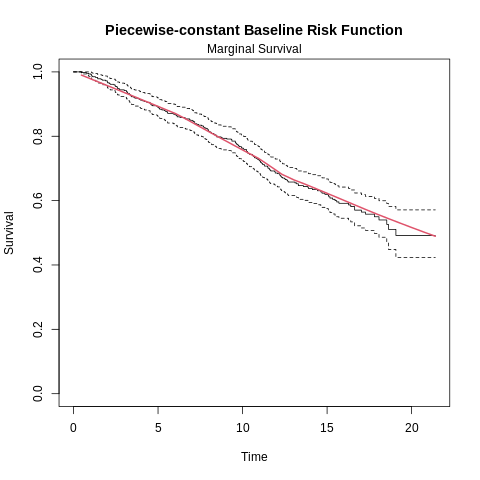

In [ ]:
%%R
plot(JMfit_02, 3, add.KM = TRUE, col = 2, lwd = 2,
     main = "Piecewise-constant Baseline Risk Function",
     ylab = "Survival Probability")


`survfit()` function of {survial} pcakage creates survival curves from either a formula (e.g. the Kaplan-Meier), a previously fitted Cox model, or a previously fitted accelerated failure time model.


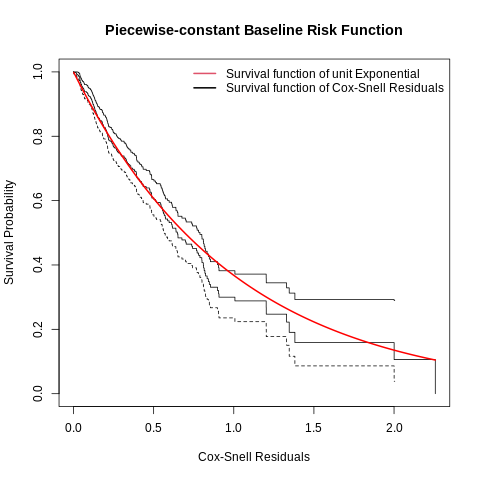

In [ ]:
%%R
res.surv <- residuals(JMfit_02, process = "Event", type = "Cox")
sfit <- survfit(Surv(res.surv,JMfit_02$y$d) ~ 1)
plot(sfit, mark.time = FALSE, conf.int = TRUE, lty = 1:2,
    xlab = "Cox-Snell Residuals", ylab = "Survival Probability",
    main = "Piecewise-constant Baseline Risk Function")
curve(pexp(x, lower.tail = FALSE), from = min(res.surv), to = max(res.surv),
    add = TRUE, col = "red", lwd = 2)
legend("topright", c("Survival function of unit Exponential",
    "Survival function of Cox-Snell Residuals"), lty = 1, lwd = 2, col = 2:1, bty = "n")



::: callout-note
`Cox-Snell residuals` are a diagnostic tool used in survival analysis to assess the fit of a survival model, such as a Cox proportional hazards model or parametric survival models. They transform survival data into residuals that should ideally follow a standard exponential distribution with a mean of 1, under the assumption that the model is correctly specified.
:::


#### Hazard Ratio


The `cinfint()` function calculates the hazard ratio for the treatment effect in the survival model. This ratio quantifies the relative risk of death between the two treatment groups.


In [ ]:
%%R
exp(confint(JMfit_02, parm = "Event"))

            2.5 %      est.    97.5 %
drugddI 1.0510576 1.4206752 1.9202736
Assoct  0.2637343 0.3323346 0.4187786



we also compare with the time-dependent Cox model


In [ ]:
%%R
exp(confint(survFit))

            2.5 %   97.5 %
drugddI 0.9264493 1.643414


#### Expected survival probabilities


`survfitJM()` function calculates the expected survival probabilities for each patient at specific time points based on the joint model.

Here we compute the expected survival probabilities for two patients (5, 141) in the data set who has not died by the time of loss to follow-up. The function assumes that the patient has survived up to the last time point $t$ in newdata for which a CD4 measurement was recorded, and will produce survival probabilities for a set of predefined $u > t$ values


In [ ]:
%%R
set.seed(300716) # it uses Monte Carlo samples
pred <- survfitJM(JMfit_02, newdata = aids[aids$patient %in% c("5", "141"), ],
          idVar = "patient")  # last.time = "Time"

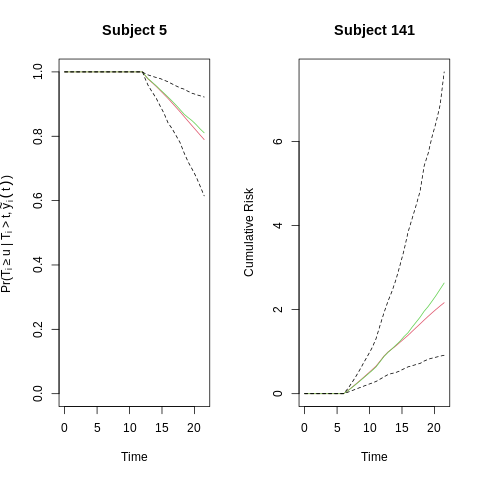

In [ ]:
%%R

par(mfrow=c(1,2))
plot(pred, which = "5", conf.int = TRUE)
plot(pred, which = "141", conf.int = TRUE,
     fun = function (x) -log(x), ylab = "Cumulative Risk")

#### Prediction

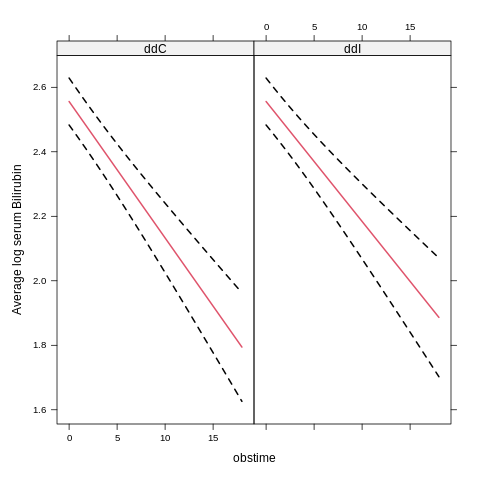

In [ ]:
%%R
DF <- with(aids, expand.grid(drug = levels(drug),
    obstime = seq(min(obstime), max(obstime), len = 100)))
Ps <- predict(JMfit_02, DF, interval = "confidence", return = TRUE)
require(lattice)
xyplot(pred + low + upp ~ obstime | drug, data = Ps,
    type = "l", col = c(2,1,1), lty = c(1,2,2), lwd = 2,
    ylab = "Average log serum Bilirubin")

## The {joineR} package


The {joineR} package is designed to facilitate the analysis of data from longitudinal studies, which involve collecting multiple measurements over time from the same subjects. Each subject’s data consists of a series of repeated measurements as well as a potentially censored time-to-event outcome, such as the time until a particular event occurs. To model the repeated measurements, the package utilizes a linear model that incorporates random effects, allowing for the analysis of individual variations over time. Additionally, a correlated error structure can be included to account for any dependencies among the measurements. For the time-to-event outcomes, the modeling framework employs a Cox proportional hazards model augmented with log-Gaussian frailty. This approach enables the analysis of the effects of covariates on the timing of events while accounting for unobserved heterogeneity among subjects. A key feature of this framework is the ability to capture stochastic dependence between the two components of the model. Specifically, it allows the Gaussian random effects from the linear model—representing subject-specific variations—to be correlated with the frailty term in the Cox proportional hazards model. This correlation can provide deeper insights into the relationships between the repeated measurements and the timing of events, leading to more comprehensive and nuanced interpretations of the


### Data


The `mental` data-set relates to a study in which 150 patients suffering from chronic mental illness were randomised amongst three different drug treatments: placebo and two active drugs. A questionnaire instrument was used to assess each patient’s mental state at weeks 0, 1, 2, 4, 6 and 8 post-randomization. The data can be loaded with the command:


In [ ]:
%%R
library(joineR)
data("mental")


A total of 150 subjects were enrolled in the study, but only 68 of them completed all measurements at weeks 0, 1, 2, 4, 6, and 8. The remaining participants left the study early for various reasons, some of which were believed to be related to their mental state. As a result, the dropout rate may provide informative insights. The data from the first five subjects can be accessed as usual.


In [ ]:
%%R
mental[1:5, ]

  id Y.t0 Y.t1 Y.t2 Y.t4 Y.t6 Y.t8 treat n.obs surv.time cens.ind
1  1   55   NA   NA   NA   NA   NA     2     1     0.704        0
2  2   44   NA   NA   NA   NA   NA     1     1     0.740        0
3  3   65   67   NA   NA   NA   NA     2     2     1.121        1
4  4   64   56   NA   NA   NA   NA     2     2     1.224        1
5  5   47   48   NA   NA   NA   NA     2     2     1.303        0



The data is stored in a balanced format, consisting of 150 rows (one for each subject) and 11 columns. These columns include a subject identifier, the measured values from the questionnaire taken at each of the six scheduled follow-up times, the treatment allocation, the count of non-missing measured values, an imputed dropout time, and a censoring indicator. The censoring indicator is coded as 1 for subjects who dropped out for reasons believed to be related to their mental health state and as 0 for all others. It's important to note the distinction made between potentially informative dropout and censoring, with the latter being regarded as uninformative. Thus, the command:


In [ ]:
%%R
table(mental$cens[is.na(mental$Y.t8)])


 0  1 
21 61 



shows that 21 of the 82 dropouts did so for reasons unrelated to their mental health.


### Converting between balanced and unbalanced data-formats


Two functions are provided for converting objects from one format to another. The code below demonstrates how to convert the `mental` dataset from a balanced format to an unbalanced format. It also includes a mnemonic renaming of the column that now contains all the repeated measurements.


In [ ]:
%%R
mental.unbalanced <- to.unbalanced(mental, id.col = 1,
                                   times = c(0, 1, 2, 4, 6, 8),
                                   Y.col = 2:7, other.col = 8:11)
names(mental.unbalanced)

[1] "id"        "time"      "Y.t0"      "treat"     "n.obs"     "surv.time"
[7] "cens.ind" 


In [ ]:
%%R
names(mental.unbalanced)[3] <- "Y"



The following code converts the new object back to the balanced format:


In [ ]:
%%R
mental.balanced <- to.balanced(mental.unbalanced, id.col = 1,
                               time.col = 2,
                               Y.col = 3, other.col = 4:7)
dim(mental.balanced)

[1] 150  11



Once a data-set is in the balanced format (if it is unbalanced then to.balanced can be applied) then the mean, variance and correlation matrix of the responses can be extracted using `summarybal()`. An example is given below using the mental data-set:


In [ ]:
%%R
summarybal(mental, Y.col = 2:7, times = c(0, 1, 2, 4, 6, 8),
           na.rm = TRUE)

$mean.vect
     x        y
Y.t0 0 55.77333
Y.t1 1 53.03378
Y.t2 2 50.37008
Y.t4 4 48.62963
Y.t6 6 46.94048
Y.t8 8 46.02941

$variance
    Y.t0     Y.t1     Y.t2     Y.t4     Y.t6     Y.t8 
132.1228 152.7403 167.5366 168.6653 228.8759 181.4917 

$cor.mtx
          [,1]      [,2]      [,3]      [,4]      [,5]      [,6]
[1,] 1.0000000 0.5939982 0.4537496 0.4186798 0.3432355 0.2997679
[2,] 0.5939982 1.0000000 0.7793311 0.6805021 0.6631543 0.6149448
[3,] 0.4537496 0.7793311 1.0000000 0.7992470 0.7077238 0.6202277
[4,] 0.4186798 0.6805021 0.7992470 1.0000000 0.8108585 0.7402240
[5,] 0.3432355 0.6631543 0.7077238 0.8108585 1.0000000 0.8681933
[6,] 0.2997679 0.6149448 0.6202277 0.7402240 0.8681933 1.0000000



### Exploring covariance structure

In [ ]:
%%R
y <- as.matrix(mental[, 2:7])
# converts mental from list format to numeric matrix format
means <- matrix(0, 3, 6)

for (trt in 1:3) {
   ysub <- y[mental$treat == trt, ]
   means[trt,] <- apply(ysub, 2, mean, na.rm = TRUE)
}

residuals <- matrix(0, 150, 6)

for (i in 1:150) {
   residuals[i,] <- y[i,] - means[mental$treat[i], ]
}

V <- cov(residuals, use = "pairwise")
R <- cor(residuals, use = "pairwise")
round(cbind(diag(V), R), 3)


        [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]
[1,] 131.774 1.000 0.612 0.472 0.464 0.391 0.321
[2,] 142.171 0.612 1.000 0.766 0.663 0.650 0.603
[3,] 159.711 0.472 0.766 1.000 0.792 0.712 0.624
[4,] 153.364 0.464 0.663 0.792 1.000 0.799 0.738
[5,] 198.350 0.391 0.650 0.712 0.799 1.000 0.861
[6,] 167.886 0.321 0.603 0.624 0.738 0.861 1.000


### Creating a jointdata object


A `jointdata()` object is a list that can contain up to three data frames, including repeated measurement data, time-to-event data, and baseline covariate data. The repeated measurement data must be stored in an unbalanced format, while the time-to-event and baseline covariate data should be stored in a balanced format, meaning there should be one line for each subject. Each data frame must include a column for the subject ID, and these subject ID columns across all three data frames must match. The UniqueVariables function offers a convenient way to extract the time-to-event and baseline covariate data from an unbalanced data frame, as demonstrated in the following example.


In [ ]:
%%R
mental.long <- mental.unbalanced[, 1:3]
mental.surv <- UniqueVariables(mental.unbalanced,
                               6:7, id.col = 1)
mental.baseline <- UniqueVariables(mental.unbalanced,
                                   4, id.col = 1)
mental.jd <- jointdata(mental.long,
                       mental.surv,
                       mental.baseline,
                       id.col = "id",
                       time.col = "time")


### Model Fitting


The package includes functions for fitting two different classes of model using maximum likelihood estimation. The first is an extended version of the random effects model proposed by Wulfsohn and Tsiatis (1997). See Henderson et al. (2000). The second is the transformation model described by Diggle et al. (2008).

The random effects model is fitted using the `joint()` function. This generic function fits a joint model with random latent association, building on the formulation described in Wulfsohn and Tsiatis (1997) while allowing for the presence of longitudinal and survival covariates, and three choices for the latent process. The link between the longitudinal and survival processes can be proportional or separate. When failure is attributable to 2 separate causes, a competing risks joint model is fitted as per Williamson et al. (2008).


In [ ]:
%%R
model.jointrandom <- joint(mental.jd, Y.t0 ~ 1 + time + treat,
                           Surv(surv.time, cens.ind) ~ treat,
                           model = "int")
names(model.jointrandom)

 [1] "coefficients" "sigma.z"      "sigma.u"      "hazard"       "loglik"      
 [6] "numIter"      "convergence"  "model"        "sepassoc"     "sepests"     
[11] "compRisk"     "sep.loglik"   "formulae"     "data"         "call"        



There is a `summary()` method for a model fitted using joint. This produces a summarized version of the model fit, omitting some of the information contained within the fitted object itself. The summary method for a joint object is demonstrated below:


In [ ]:
%%R
summary(model.jointrandom)


Call:
joint(data = mental.jd, long.formula = Y.t0 ~ 1 + time + treat, 
    surv.formula = Surv(surv.time, cens.ind) ~ treat, model = "int")

Random effects joint model
 Data: mental.jd 
 Log-likelihood: -2884.045 

Longitudinal sub-model fixed effects: Y.t0 ~ 1 + time + treat                      
(Intercept) 61.9221415
time        -0.5969329
treat       -3.8544659

Survival sub-model fixed effects: Surv(surv.time, cens.ind) ~ treat                
treat -0.6001792

Latent association:                  
gamma_0 0.08654259

Variance components:
     U_0 Residual 
99.84760 64.34334 

Convergence at iteration: 32 

Number of observations: 900 
Number of groups: 150 



The function `jointSE()` provides standard errors and confidence intervals for the parameters defining the mean response profiles in a random effects joint model. Currently, the calculation of standard errors for the random effect parameters is not implemented. However, approximate standard errors can be obtained through a parametric bootstrap, which involves re-estimating the model parameters from simulated realizations of the fitted model. The first two arguments for `jointSE()` are the results from calling the `joint()` function, with the corresponding `jointdata` object automatically stored as part of the model fit. The second argument allows you to specify the number of bootstrap samples to be taken. The remaining arguments are included for completeness; they mirror the last four arguments of the `joint()` function and provide an additional option to control the level of output displayed in the R terminal. Be aware that with a sufficiently large number of bootstrap samples, this function can be slow to execute. If you run the function with only 100 bootstrap samples, the output will reflect this number, and the confidence limits will default to zero unless at least 100 bootstrap samples are taken.


In [ ]:
%%R
model.jointrandom.se <- jointSE(model.jointrandom, n.boot = 100)
model.jointrandom.se

     Component   Parameter Estimate      SE 95%Lower 95%Upper
1 Longitudinal (Intercept)  61.9221  2.4101  57.1888  66.2523
2                     time  -0.5969  0.1815  -0.9927  -0.2663
3                    treat  -3.8545  1.0138  -6.0339  -2.3929
4      Failure       treat  -0.6002  0.2108  -1.1104  -0.2402
5  Association     gamma_0   0.0865  0.0212   0.0590   0.1438
6     Variance         U_0  99.8476 10.3682  73.4763 115.6512
7                 Residual  64.3433  6.6397  50.2379  73.9636


## Summary and Conclusions


This tutorial covered the essential concepts and practical applications of  Standard (Shared Random Effects) Joint model of longitudinal and time-to-event data in R. We began by introducing the theoretical background of joint models and their relevance in clinical research. We then demonstrated how to fit univariate and multivariate joint models using {JM}, and {joineR} packages. We also discussed the importance of functional forms in joint models and how to specify them in the model fitting process. Additionally, we explored dynamic predictions and predictive accuracy metrics, such as ROC curves, calibration plots, and Brier scores. Finally, we introduced the concept of competing risks and illustrated how to fit joint models for competing risks data.

This tutorial helps researchers and practitioners understand the principles of joint modeling and provides practical guidance on implementing these models in R. By following the step-by-step instructions and examples provided in this tutorial, users can gain a comprehensive understanding of joint models and apply them to their own longitudinal and time-to-event data.


## Resources


1.  [A Tutorial for Joint Modeling of Longitudinal and Time-to-Event Data in R](https://qcmb.psychopen.eu/index.php/qcmb/article/view/2979/2979.html)

2.  [Joint Models for Longitudinal and Time-to-Event Data with Applications in R by Dimitris Rizopoulos](https://jmr.r-forge.r-project.org/)

3.  [Joint Models for Longitudinal and Time-to-Event Data](https://www.drizopoulos.com/courses/EMC/ESP72.pdf)

4.  [Chapter 4 Joint Models for Longitudinal and Time-to-Event Data](https://bookdown.org/sestelo/sa_financial/joint-models-for-longitudinal-and-time-to-event-data.html)

5.  [joineR](https://cran.r-project.org/web/packages/joineR/vignettes/joineR.html)

6.  [Multivariate Joint Models](https://www.drizopoulos.com/vignettes/multivariate%20joint%20models)

7.  [JMbayes2: Extended Joint Models for Longitudinal and Time-to-Event Data](https://drizopoulos.github.io/JMbayes2/index.html)